In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
e = np.e
sigma_form_forward=2.5
p_form_forward=0.16
distances = np.linspace(0, 100, 1000)
distances.size

1000

In [3]:
results_form_forward = p_form_forward * (e**(-(distances**2)/(2*(sigma_form_forward**2))))

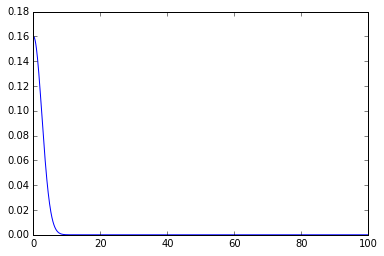

In [4]:
plt.plot(distances, results_form_forward)

In [5]:
relevance = np.logical_not(
    np.isclose(results_form_forward, np.zeros(results_form_forward.size), 10**-4,10**-4))

In [6]:
relevant_indices = np.nonzero(relevance)[0]

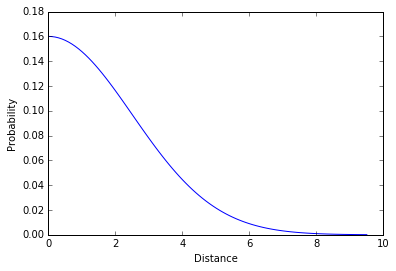

In [7]:
plt.plot(distances[relevant_indices], results_form_forward[relevant_indices])
plt.xlabel("Distance")
plt.ylabel("Probability")

## Self discussion area

I don't have much space left on SpiNNaker. Putting a table like this in DTCM might be ok, but what about comparing these values? Would this still be efficient, or would I need to transform them to something like uint16 or something?

How is the exponential decay table generated for STDP?



In [8]:
2 ** 16

65536

Will only have a look at the "relevant" probability values as defined previously

In [9]:
relevant_results = results_form_forward[relevant_indices]

In [10]:
scaled_results = relevant_results * 2**16

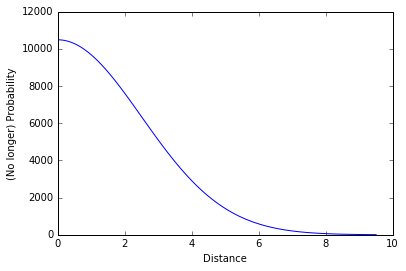

In [11]:
plt.plot(distances[relevant_indices], scaled_results)
plt.xlabel("Distance")
plt.ylabel("(No longer) Probability")

In [12]:
quantized_results = scaled_results.astype(dtype="uint16")

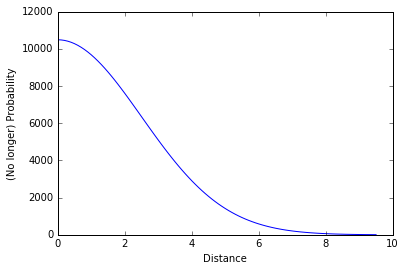

In [16]:
plt.plot(distances[relevant_indices], quantized_results)
plt.xlabel("Distance")
plt.ylabel("(No longer) Probability")

In [17]:
quantized_results.size

96

In [18]:
quantized_results

array([10485, 10477, 10452, 10410, 10352, 10277, 10187, 10081,  9961,
        9826,  9678,  9516,  9342,  9157,  8961,  8755,  8540,  8317,
        8087,  7850,  7609,  7363,  7113,  6861,  6608,  6353,  6099,
        5845,  5593,  5343,  5096,  4853,  4614,  4380,  4151,  3927,
        3710,  3499,  3295,  3098,  2907,  2725,  2549,  2381,  2221,
        2068,  1922,  1784,  1653,  1530,  1413,  1303,  1200,  1103,
        1012,   927,   848,   775,   707,   643,   585,   531,   481,
         435,   393,   354,   319,   286,   257,   230,   206,   184,
         164,   146,   130,   115,   102,    90,    79,    70,    62,
          54,    47,    41,    36,    32,    27,    24,    21,    18,
          15,    13,    11,    10,     8,     7], dtype=uint16)

In [20]:
print "Size in words of the resulting table"
quantized_results.size // 2

Size in words of the resulting table


48